In [1]:
] activate ../ 

In [2]:
using Revise
using POMDPs
using GridInterpolations 
using POMDPModelTools
using POMDPPolicies
using Parameters
using StaticArrays
using DiscreteValueIteration 
using Distributed
using AutomotiveDrivingModels
using AutoViz
using AutomotiveSensors
using AutomotivePOMDPs
using PedestrianAvoidancePOMDP

using FileIO
using JLD2

using Interact
using Plots
using PGFPlots

┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/PedestrianAvoidancePOMDP/UuJ2S.ji for PedestrianAvoidancePOMDP [a80ff0fe-e6a0-11e8-3b05-15413bd5ea7a]
└ @ Base loading.jl:1187


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8aba838c786c5efc57ce972283fe501fcaad5d6f-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8aba838c786c5efc57ce972283fe501fcaad5d6f-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [3]:
# 1) choose betwenn only longitudinal
lateral_actions = [0.0]
# or lateral and longitudinal support
#lateral_actions = [1.0, 0.0, -1.0]


# 2) choose good values for the policy
# good values are the longitudinal support are following
# COLLISION_COST = -600.0
# ACTION_LON_COST = 0.0
# ACTION_LAT_COST = 0.0
# KEEP_VELOCITY_REWARD = 30.0
# KEEP_LANE_REWARD = 0.0
# PROBABILITY_PEDESTRIAN_BIRTH = 0.4


pomdp = SingleOCFPOMDP(lateral_actions=lateral_actions)
pomdp.COLLISION_COST = -600.0
pomdp.ACTION_LON_COST = 0.0
pomdp.ACTION_LAT_COST = 0.0
pomdp.KEEP_VELOCITY_REWARD = 20.0
pomdp.KEEP_LANE_REWARD = 0.0
pomdp.PROBABILITY_PEDESTRIAN_BIRTH = 0.05
pomdp.γ = 0.95

# train policy
solver = SparseValueIterationSolver(max_iterations=200, belres=1e-4, include_Q=true, verbose=true)
mdp = UnderlyingMDP(pomdp);
vi_policy = solve(solver, mdp)
qmdp_policy = AlphaVectorPolicy(pomdp, vi_policy.qmat, vi_policy.action_map)

# save policy!
FileIO.save("policy.jld2", "policy", qmdp_policy)


┌ Info: residual: 864.7827307947099, time: 1.683649031, total time: 1.683649031 
│   i = 1
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 813.4405160221016, time: 0.221134073, total time: 1.904783104 
│   i = 2
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 752.0246031947531, time: 0.198390672, total time: 2.103173776 
│   i = 3
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 693.878018186816, time: 0.267839679, total time: 2.3710134550000004 
│   i = 4
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 650.9190626601766, time: 0.29145671, total time: 2.662470165 
│   i = 5
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 60

┌ Info: residual: 2.3196444260002522, time: 0.188918046, total time: 11.244531569 
│   i = 43
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 2.2036622047002083, time: 0.14002446, total time: 11.384556028999999 
│   i = 44
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 2.093479094465181, time: 0.182038347, total time: 11.566594376 
│   i = 45
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 1.9888051397419986, time: 0.156702367, total time: 11.723296742999999 
│   i = 46
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 1.889364882754876, time: 0.181913648, total time: 11.905210390999999 
│   i = 47
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl

┌ Info: residual: 0.2690375131538758, time: 0.158519531, total time: 19.390571946999994 
│   i = 85
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.2555856374961536, time: 0.142844281, total time: 19.533416227999993 
│   i = 86
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.24280635562138286, time: 0.562442497, total time: 20.095858724999992 
│   i = 87
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.23066603784030804, time: 0.183797151, total time: 20.279655875999993 
│   i = 88
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.21913273594833527, time: 0.13970502, total time: 20.419360895999993 
│   i = 89
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ez

┌ Info: residual: 0.034574591012471956, time: 0.140861483, total time: 27.68589192699999 
│   i = 125
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.032845861461908044, time: 0.146612555, total time: 27.83250448199999 
│   i = 126
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.031203568388775693, time: 0.146481089, total time: 27.978985570999992 
│   i = 127
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.02964338996935112, time: 0.149285394, total time: 28.12827096499999 
│   i = 128
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.0281612204709063, time: 0.133125927, total time: 28.26139689199999 
│   i = 129
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIterat

┌ Info: residual: 0.004443255253534062, time: 0.129335022, total time: 33.99756415999999 
│   i = 165
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.004221092490865885, time: 0.144562856, total time: 34.14212701599999 
│   i = 166
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.004010037866351013, time: 0.11569969, total time: 34.25782670599999 
│   i = 167
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.003809535973061884, time: 0.435397434, total time: 34.69322413999999 
│   i = 168
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.003619059174411632, time: 0.129588086, total time: 34.82281222599999 
│   i = 169
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueItera

In [4]:
# Visulization policy / longitudinal action

gr()
policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
   # ego_v = 8.0
    @manipulate for ped_v in pomdp.PED_V_RANGE
   # ped_v = 0.0
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                act = action(qmdp_policy, b) 
                policy_grid[i,j] = act.acc
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:ego_v=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
15,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5"  …  "9.5", "10.0", "10.5", "11.0", "11.5", "12.0", "12.5", "13.0", "13.5", "14.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"7.0",:value=>Observable{Float64} with 2 listeners. Value:
7.0), Observable{Float64} with 2 listeners. Value:
7.0, Scope("knockout-component-c31f1e50-92a9-45bd-81a3-81f86619e39c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ego_v"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>29,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5"  …  "9.5", "10.0", "10.5", "11.0", "11.5", "12.0", "12.5", "13.0", "13.5", "14.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"7.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/xubuntu/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/xubuntu/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/xubuntu/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/xubuntu/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/xubuntu/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\\"0.5\\\",\\\"1.0\\\",\\\"1.5\\\",\\\"

In [5]:
# Visulization policy / lateral action

gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
    @manipulate for ped_v in pomdp.PED_V_RANGE
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                act = action(qmdp_policy, b) 
                policy_grid[i,j] = act.lateral_movement
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:ego_v=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
15,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5"  …  "9.5", "10.0", "10.5", "11.0", "11.5", "12.0", "12.5", "13.0", "13.5", "14.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"7.0",:value=>Observable{Float64} with 2 listeners. Value:
7.0), Observable{Float64} with 2 listeners. Value:
7.0, Scope("knockout-component-068a23ba-e906-49c4-97ec-1f8bede5b3d5", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ego_v"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>29,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5"  …  "9.5", "10.0", "10.5", "11.0", "11.5", "12.0", "12.5", "13.0", "13.5", "14.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"7.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/xubuntu/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/xubuntu/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/xubuntu/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/xubuntu/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/xubuntu/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\\"0.5\\\",\\\"1.0\\\",\\\"1.5\\\",\\\"

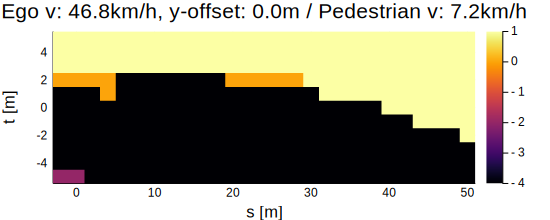

In [8]:
# generate plots of the policy

gr(size=(550,220))
p = heatmap()
for ego_v in [ 4.0, 7.5, 13.0]
    p = heatmap()
    policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))
    ped_v = 2.0
    ego_y = 0.0
    title = string("Ego v: ", round(ego_v*3.6,digits=1), "km/h, y-offset: ", ego_y, "m  /  Pedestrian v: ", ped_v*3.6, "km/h")
    for i=1:length(pomdp.T_RANGE)
                ped_t = pomdp.T_RANGE[i]
                for j=1:length(pomdp.S_RANGE)
                    ped_s = pomdp.S_RANGE[j]
                    b = SparseCat([SingleOCFState(ego_y, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                    act = action(qmdp_policy, b) 
                    policy_grid[i,j] = act.acc
                end
    end
    xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
    ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
    p = heatmap(xs,ys,policy_grid, xlabel="s [m]", ylabel="t [m]", title=title)
    savefig(string("policy_ego_v_", ego_v, "_ego_y_", ego_y, "_ped_v_", ped_v,  ".pdf"))
end
p

In [ ]:
b = SingleOCFBelief([SingleOCFState(0.0, 5.0, 50.0, 3.0, 1.57, 0.0)], [1.0])
act = action(qmdp_policy, b) # policy
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy,b)
vi_policy.util[18223]


#######################

b = SparseCat([SingleOCFState(0.0, 18.0, -10.0, -10.0, pomdp.PED_THETA_RANGE[1], 0.0)],[1.])
act = action(qmdp_policy, b) 
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy, b)


#######################

# Test action space
cnt = 0
for (index, a) in enumerate(pomdp.action_space)
    idx = actionindex(pomdp,a)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
    println(a)
end
println(cnt)


#######################

s = SingleOCFState(0.0, 14, 50.0, -3.0, 1.57, 0.0)
sp = SingleOCFState(0.0, 14., 50.0, 0.0, 1.57, 0.0)
act = SingleOCFAction(0.0, 0.0)
print("reward: ", reward(pomdp, s, act, sp))

b = SparseCat([sp],[1.])
act = action(qmdp_policy, b) 
